# Features and Image segmentation
---

Most features fall into one of three categories: edges, blobs, and corners.

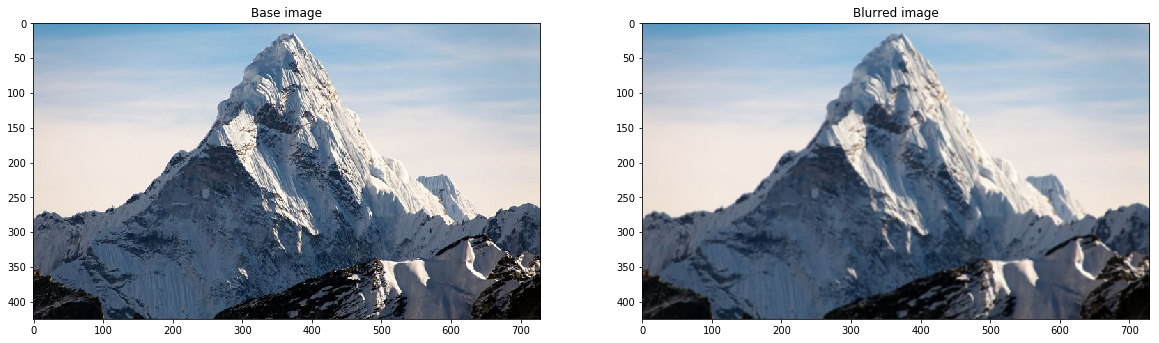

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
mount_olympus = cv2.imread('images/olympus.jpg')
mount_olympus = cv2.cvtColor(mount_olympus, cv2.COLOR_BGR2RGB)

blurred_mount = cv2.GaussianBlur(mount_olympus, (5,5), 0)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Base image')
ax1.imshow(mount_olympus, cmap='gray')
ax2.set_title('Blurred image')
ax2.imshow(blurred_mount, cmap='gray')

### Edges

Edges are just areas in an image where the intensity abruptly changes. Also known as areas that have a high intensity gradient.

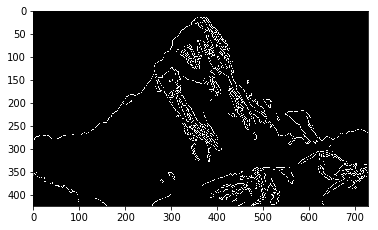

In [2]:
lower = 100
upper = 250

mount_edges = cv2.Canny(blurred_mount, lower, upper)

plt.imshow(mount_edges, cmap="gray")

### Blobs
---
Blobs are region based features that may include areas of extreme highs or lows in intensity or areas of a unique texture.

![Blobs](images/Blobs.png)

### Corners
---
Corners are at the intersection of two edges and form what looks like a corner or a sharp point.

![corners](images/Corners.png)

These are the most repeatable feature which means that they're easy to recognize given two or more images of the same scene. For example:

![Corners_2](images/Corners_2.png)

The third pattern contains 2 corners, which makes its location easily identified as the bottom right. This is because a corner represents a point where two edges change.

## Corner Detector
---
Corners are the intersection of two edges and we can detect them by taking a window, which is generally a square area that contains a group of pixels and looking at where the gradient is high in all directions. Each of these gradient measurements has 
an associated magnitude which is a measurement of the strength of the gradient, and a direction which is the direction of the change in intensity.

![Corner_detector](images/Corner_detector.png)

To detect a corner, we shift a window around an area in an image, and check for big variations in the direction and magnitud of the gradient.

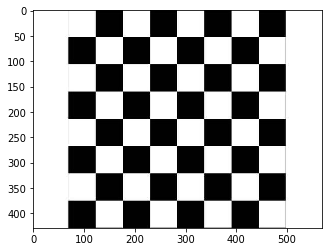

In [4]:
# Load and convert to grayscale to detect changes in intensity
image = cv2.cvtColor(cv2.imread("images/chess.jpg"), cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")

### Detect corners with a Harris corner detector

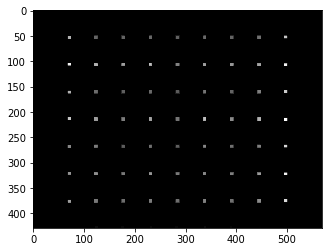

In [17]:
image_copy = np.copy(image_gray)

# Convert to float32
image_copy = np.float32(image_copy)

# Detect corners with a Harris corner detector
# parameters: image, blocksize: size of the neighborhood considered for corner detection, 
# ksize: apperture parameter of sobel, k: Harris detector, usually 0.04
dst = cv2.cornerHarris(image_copy, 2, 3, 0.04)

# Dilate the corners
dst = cv2.dilate(dst, np.ones((3,3)), iterations=2)

plt.imshow(dst, cmap="gray")

### Select strong corners

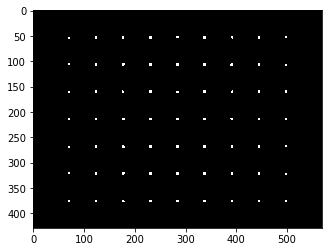

In [15]:
# Define a threshold to extract strong corners
thresh = 0.1 * dst.max()

strong_corners = np.zeros(dst.shape)
strong_corners[dst>thresh]=[255]

plt.imshow(strong_corners, cmap="gray")

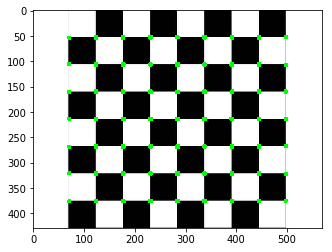

In [18]:
# create an image to draw the corners on
corner_image = np.copy(image)

# Iterate through all the corners, and draw them on the image if they pass the threshold
for j in range(0, dst.shape[0]):
    for i in range(0,dst.shape[1]):
        if(dst[j,i] > thresh):
            cv2.circle(corner_image, (i,j), 1, (0,255,0), 1)

# corner_image[dst>0.05*dst.max()]=[0,255,0]
            
plt.imshow(corner_image)

Dilation and Erosion
---

Dilation and erosion are known as morphological operations. They are often performed on binary images, similar to contour detection. Dilation enlarges bright, white areas in an image by adding pixels to the perceived boundaries of objects in that image. Erosion does the opposite: it removes pixels along object boundaries and shrinks the size of objects.

Often these two operations are performed in sequence to enhance important object traits.

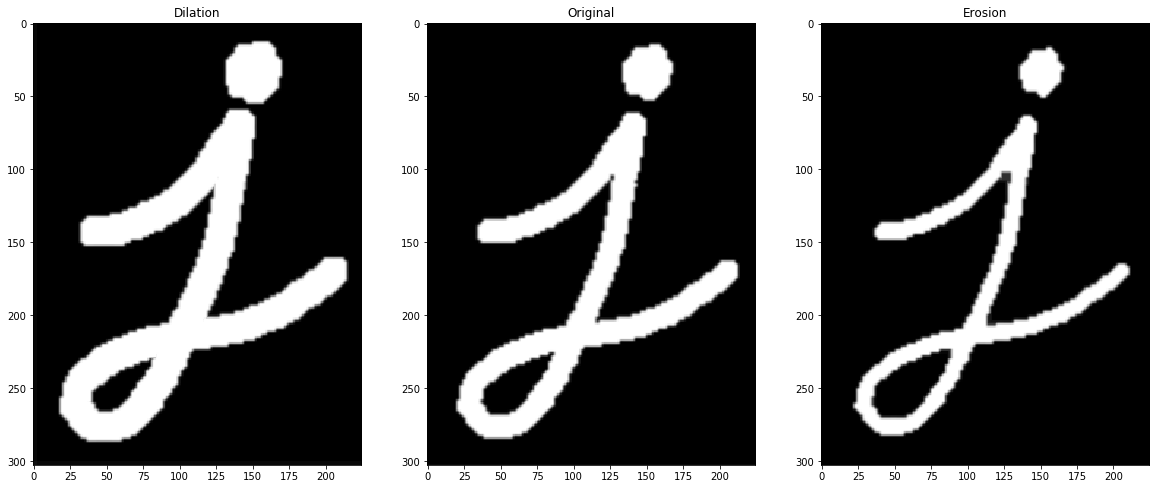

In [12]:
# by adding a 0 to the imread, you can read it in grayscale
letter = cv2.imread("images/j.png", 0)

kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(letter, kernel, iterations = 1)
erosion = cv2.erode(letter, kernel, iterations = 1)

f2, (ax21, ax22, ax23) = plt.subplots(1, 3, figsize=(20,10))
ax21.set_title("Dilation")
ax21.imshow(dilation, cmap="gray")
ax22.set_title("Original")
ax22.imshow(letter, cmap="gray")
ax23.set_title("Erosion")
ax23.imshow(erosion, cmap="gray")

### Opening and Closing

These operations are often combined for desired results. One such combination is called **opening**, which is erosion followed by dilation. This is useful in noise reduction in which erosion first gets rid of noise (and shrinks the object) then dilation enlarges the object again, but the noise will have disappeared from the previous erosion.

**Closing** is the reverse combination of opening; it’s dilation followed by erosion, which is useful in closing small holes or dark areas within an object. 

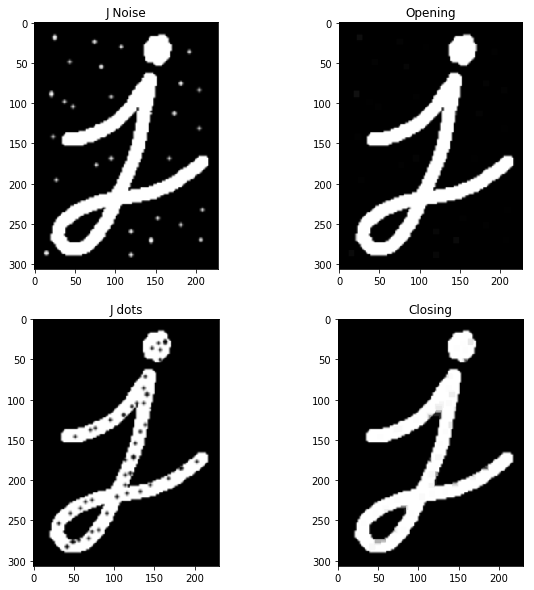

In [13]:
letter_noise = cv2.imread("images/j_noise.png", 0)
letter_dots = cv2.imread("images/j_dots.png", 0)

kernel = np.ones((7,7), np.uint8)

opening = cv2.morphologyEx(letter_noise, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(letter_dots, cv2.MORPH_CLOSE, kernel)

f3, ((ax31, ax32), (ax33, ax34)) = plt.subplots(2, 2, figsize=(10,10))
ax31.set_title("J Noise")
ax31.imshow(letter_noise, cmap="gray")
ax32.set_title("Opening")
ax32.imshow(opening, cmap="gray")

ax33.set_title("J dots")
ax33.imshow(letter_dots, cmap="gray")
ax34.set_title("Closing")
ax34.imshow(closing, cmap="gray")